In [151]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [152]:
df1=pd.read_csv('dpe1.csv')


C:\Users\marie\AppData\Local\Temp\ipykernel_12496\1942843383.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('dpe1.csv')


In [153]:
df1.head()

,id,numero_dpe,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,version_methode_dpe,nom_methode_etude_thermique,version_methode_etude_thermique,date_visite_diagnostiqueur,...,tv017_zone_hiver_code,tv017_zone_hiver_t_ext_moyen,tv017_zone_hiver_peta_cw,tv017_zone_hiver_dh14,tv017_zone_hiver_prs1,tv018_zone_ete_code,tv018_zone_ete_sclim_inf_150,tv018_zone_ete_sclim_sup_150,tv018_zone_ete_rclim_autres_etages,tv018_zone_ete_rclim_dernier_etage
0,179,1330V8000001A,3710,3,8,Méthode Facture,NaN,\N,\N,2013-04-10,...,H3,9.65,14.5,22200,2.9,Ed,5,7,4.0,5
1,355,1356V4000001E,444,3,4,Facture,facture,\N,\N,2013-04-12,...,H2,8.08,12.0,33300,3.4,Ea,2,4,1.5,2
2,410,1317V7000001E,7374,2,7,3CL - DPE,V2012,\N,\N,2013-04-11,...,H2,8.08,12.0,33300,3.4,Ec,4,6,3.0,4
3,429,1369V4000001I,6931,7,4,3CL,Version 1.3,\N,\N,2013-04-02,...,H1,6.58,10.5,42030,3.6,Ec,4,6,3.0,4
4,470,1364V8000001H,231,3,8,Méthode Facture,NaN,\N,\N,2013-04-15,...,H2,8.08,12.0,33300,3.4,Ec,4,6,3.0,4


In [ ]:
missing_values=df1.isna().sum()
missing_values[missing_values>0]['']

version_methode_dpe                           226482
nom_methode_etude_thermique                    11478
version_methode_etude_thermique                21095
commentaires_ameliorations_recommandations    262228
explication_personnalisee                     367854
secteur_activite                               47197
commune                                          393
arrondissement                                321626
type_voie                                     292111
nom_rue                                          472
numero_rue                                    285121
batiment                                      364198
escalier                                      269714
etage                                         339208
porte                                         371084
code_postal                                      393
code_insee_commune                               402
code_insee_commune_actualise                     402
numero_lot                                    

In [155]:
df1.dtypes

id                                      int64
numero_dpe                             object
usr_diagnostiqueur_id                   int64
usr_logiciel_id                         int64
tr001_modele_dpe_id                     int64
                                       ...   
tv018_zone_ete_code                    object
tv018_zone_ete_sclim_inf_150            int64
tv018_zone_ete_sclim_sup_150            int64
tv018_zone_ete_rclim_autres_etages    float64
tv018_zone_ete_rclim_dernier_etage      int64
Length: 131, dtype: object

In [156]:
np.array(df1.columns)

array(['id', 'numero_dpe', 'usr_diagnostiqueur_id', 'usr_logiciel_id',
       'tr001_modele_dpe_id', 'nom_methode_dpe', 'version_methode_dpe',
       'nom_methode_etude_thermique', 'version_methode_etude_thermique',
       'date_visite_diagnostiqueur', 'date_etablissement_dpe',
       'date_arrete_tarifs_energies',
       'commentaires_ameliorations_recommandations',
       'explication_personnalisee', 'consommation_energie',
       'classe_consommation_energie', 'estimation_ges',
       'classe_estimation_ges', 'tr002_type_batiment_id',
       'secteur_activite', 'tr012_categorie_erp_id', 'tr013_type_erp_id',
       'annee_construction', 'surface_habitable', 'surface_thermique_lot',
       'tv016_departement_id', 'commune', 'arrondissement', 'type_voie',
       'nom_rue', 'numero_rue', 'batiment', 'escalier', 'etage', 'porte',
       'code_postal', 'code_insee_commune',
       'code_insee_commune_actualise', 'numero_lot', 'quote_part',
       'nom_centre_commercial', 'surface_commerci

In [157]:
l=df1['date_visite_diagnostiqueur'].unique()

In [158]:
l.min()

'0215-03-24'

In [159]:
l.max()

'9999-12-31'

In [160]:
len(df1)

515562

In [161]:
filter1=(df1['date_visite_diagnostiqueur']>'1677-09-21') & (df1['date_visite_diagnostiqueur']<'2026')
filter2=(df1['date_etablissement_dpe']>'1677-09-21') & (df1['date_etablissement_dpe']<'2026')
filter3=(df1['date_arrete_tarifs_energies']>'1677-09-21') & (df1['date_arrete_tarifs_energies']<'2026')
df1=df1[filter1&filter2&filter3]

In [162]:
len(df1)

515537

In [163]:
df1['date_visite_diagnostiqueur']=pd.to_datetime(df1['date_visite_diagnostiqueur'])
df1['date_etablissement_dpe']=pd.to_datetime(df1['date_etablissement_dpe'])
df1['date_arrete_tarifs_energies']=pd.to_datetime(df1['date_arrete_tarifs_energies'])

In [164]:
df1['estimation_ges']

0          1.00
1          0.00
2          0.00
3         11.53
4          0.00
          ...  
515557     7.21
515558    10.68
515559    11.90
515560    18.10
515561    15.91
Name: estimation_ges, Length: 515537, dtype: float64

<Axes: ylabel='date_etablissement_dpe'>

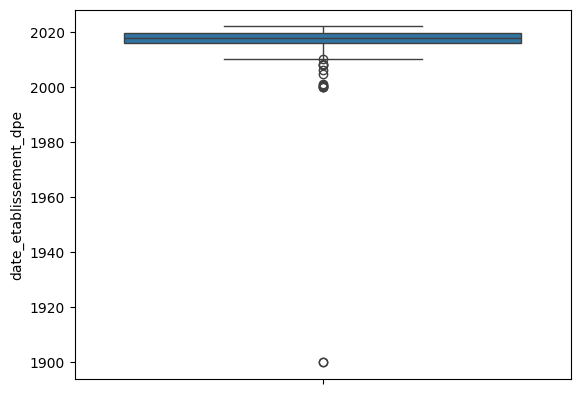

In [165]:
sns.boxplot(df1['date_etablissement_dpe'])

In [166]:
df1['date_etablissement_dpe'].describe()

count                           515537
mean     2017-09-19 12:36:31.519910656
min                1899-12-30 00:00:00
25%                2015-10-21 00:00:00
50%                2017-10-24 00:00:00
75%                2019-09-11 00:00:00
max                2021-12-21 00:00:00
Name: date_etablissement_dpe, dtype: object

In [167]:
Q1=df1['date_etablissement_dpe'].quantile(0.25)
Q3=df1['date_etablissement_dpe'].quantile(0.75)
IQR=Q3-Q1
filter=(df1['date_etablissement_dpe']>=(Q1-1.5*IQR))&(df1['date_etablissement_dpe']<=(Q3+1.5*IQR))
df1=df1[filter]

<Axes: ylabel='date_etablissement_dpe'>

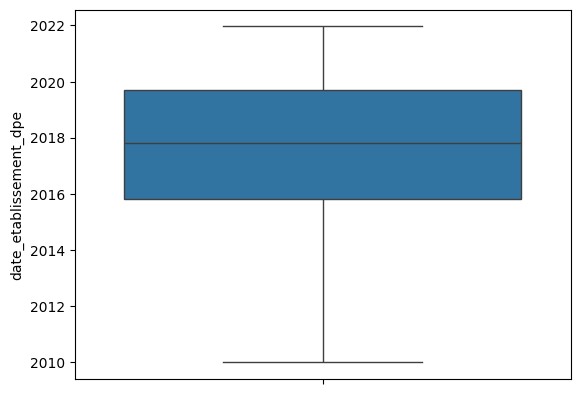

In [168]:
sns.boxplot(df1['date_etablissement_dpe'])

<Axes: ylabel='date_visite_diagnostiqueur'>

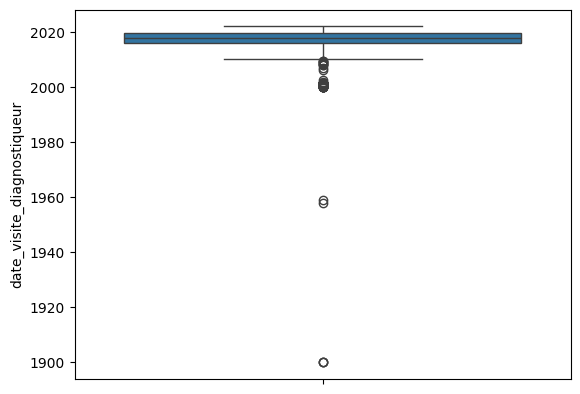

In [169]:
sns.boxplot(df1['date_visite_diagnostiqueur'])

In [170]:
Q1=df1['date_visite_diagnostiqueur'].quantile(0.25)
Q3=df1['date_visite_diagnostiqueur'].quantile(0.75)
IQR=Q3-Q1
filter=(df1['date_visite_diagnostiqueur']>=(Q1-1.5*IQR))&(df1['date_visite_diagnostiqueur']<=(Q3+1.5*IQR))
df1=df1[filter]

<Axes: ylabel='date_visite_diagnostiqueur'>

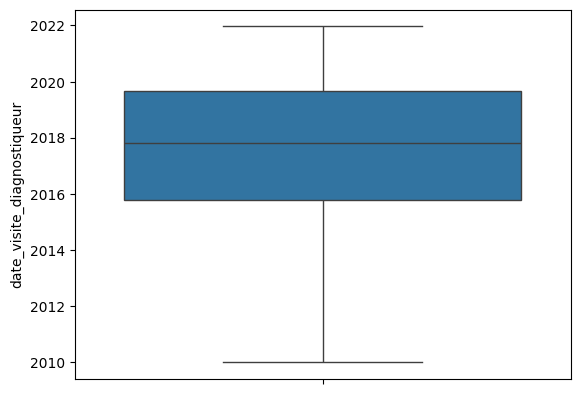

In [171]:
sns.boxplot(df1['date_visite_diagnostiqueur'])

<Axes: ylabel='date_arrete_tarifs_energies'>

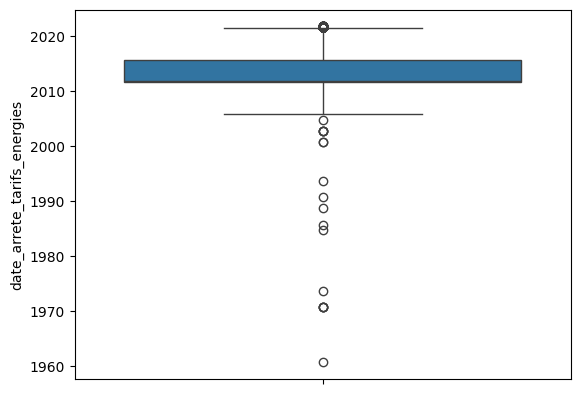

In [172]:
sns.boxplot(df1['date_arrete_tarifs_energies'])

In [173]:
Q1=df1['date_arrete_tarifs_energies'].quantile(0.25)
Q3=df1['date_arrete_tarifs_energies'].quantile(0.75)
IQR=Q3-Q1
filter=(df1['date_arrete_tarifs_energies']>=(Q1-1.5*IQR))&(df1['date_arrete_tarifs_energies']<=(Q3+1.5*IQR))
df1=df1[filter]

<Axes: ylabel='date_arrete_tarifs_energies'>

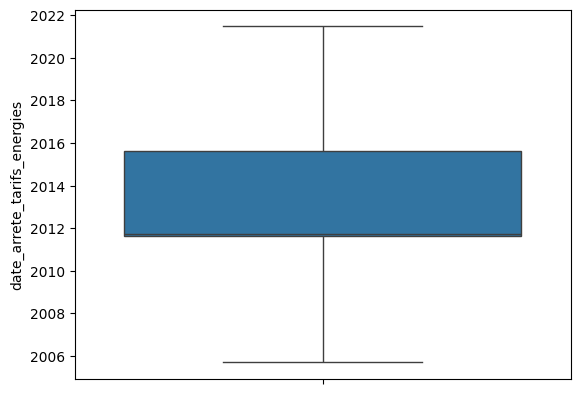

In [174]:
sns.boxplot(df1['date_arrete_tarifs_energies'])

In [175]:
len(df1)

514422

In [176]:
df1['estimation_ges'].describe()

count    5.144220e+05
mean     3.845908e+01
std      9.632605e+03
min     -2.924000e+01
25%      0.000000e+00
50%      2.490000e+00
75%      1.501000e+01
max      4.766768e+06
Name: estimation_ges, dtype: float64

<Axes: ylabel='estimation_ges'>

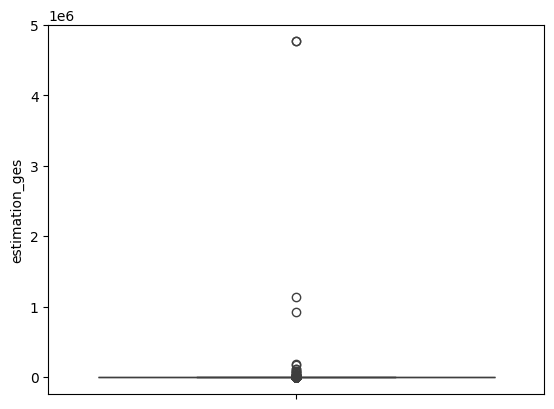

In [177]:
sns.boxplot(df1['estimation_ges'])

In [178]:
Q1=df1['estimation_ges'].quantile(0.25)
Q3=df1['estimation_ges'].quantile(0.75)
IQR=Q3-Q1
filter=(df1['estimation_ges']>=(Q1-1.5*IQR))&(df1['estimation_ges']<=(Q3+1.5*IQR))
df1=df1[filter]

<Axes: ylabel='estimation_ges'>

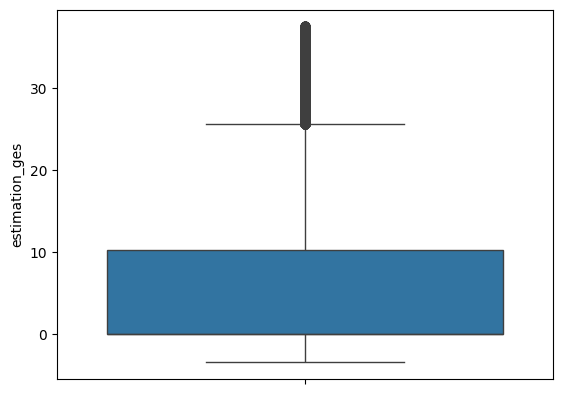

In [179]:
sns.boxplot(df1['estimation_ges'])

In [180]:
#les colonnes numeriques
numerical_columns=df1.select_dtypes(include=['number']).columns

In [183]:
df1.sort_values(by='date_visite_diagnostiqueur')

,id,numero_dpe,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,version_methode_dpe,nom_methode_etude_thermique,version_methode_etude_thermique,date_visite_diagnostiqueur,...,tv017_zone_hiver_code,tv017_zone_hiver_t_ext_moyen,tv017_zone_hiver_peta_cw,tv017_zone_hiver_dh14,tv017_zone_hiver_prs1,tv018_zone_ete_code,tv018_zone_ete_sclim_inf_150,tv018_zone_ete_sclim_sup_150,tv018_zone_ete_rclim_autres_etages,tv018_zone_ete_rclim_dernier_etage
55274,1191469,0973V8000002N,9480,3,8,Méthode Facture,NaN,\N,\N,2009-12-22,...,H1,6.58,10.5,42030,3.6,Ec,4,6,3.0,4
54171,1170896,0973V8000001M,9480,3,8,Méthode Facture,NaN,\N,\N,2009-12-22,...,H1,6.58,10.5,42030,3.6,Ec,4,6,3.0,4
180313,3705358,0941V3000001C,6607,10,3,FACTURE - DPE,V2012,\N,\N,2009-12-28,...,H2,8.08,12.0,33300,3.4,Eb,3,5,2.0,3
410589,9140944,2026V7000001C,17707,13,7,DPE VIERGE,V2012,\N,\N,2010-01-07,...,H2,8.08,12.0,33300,3.4,Ed,5,7,4.0,5
477961,10838058,1035V3000001X,1245,13,3,DPE VIERGE,V2012,\N,\N,2010-01-29,...,H2,8.08,12.0,33300,3.4,Ea,2,4,1.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485941,11035519,2113V4000086J,16594,10,4,FACTURE - DPE,V2012,\N,\N,2021-08-16,...,H3,9.65,14.5,22200,2.9,Ed,5,7,4.0,5
484202,10991011,2140N2000005Q,21413,10,12,FACTURE - DPE,V2012,Th-BCE 2012,7502,2021-10-27,...,H2,8.08,12.0,33300,3.4,Ec,4,6,3.0,4
481589,10928557,2154N2000019A,18560,10,12,FACTURE - DPE,V2012,Th-BCE 2012,7400,2021-12-11,...,H1,6.58,10.5,42030,3.6,Eb,3,5,2.0,3
482040,10939956,2154V2000875S,13279,11,2,3CL - DPE,V1.3,\N,\N,2021-12-17,...,H1,6.58,10.5,42030,3.6,Eb,3,5,2.0,3


In [187]:
df1['usr_diagnostiqueur_id'].nunique()

11384

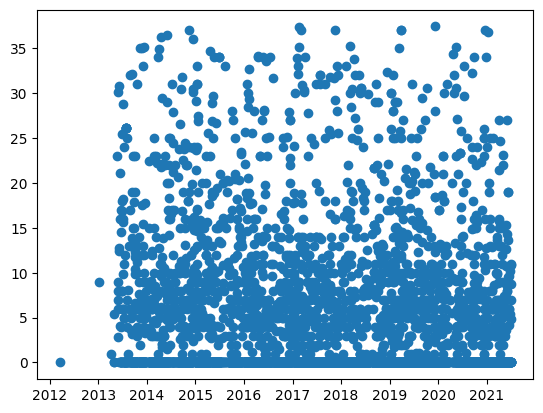

In [192]:
l=df1['tv016_departement_departement'].unique()
filter=(df1['tv016_departement_departement']==l[0])
plt.plot(df1[filter]['date_visite_diagnostiqueur'],df1[filter]['estimation_ges'],'o')

In [194]:
df1['tr002_type_batiment_id'].unique()

array([4, 5], dtype=int64)

In [195]:
df1['tr012_categorie_erp_id'].unique()

array(['\\N', '5', '4', '1', '3', '2'], dtype=object)

384408

In [224]:
def modify(ch):
    # Si ch est une chaîne de caractères, on effectue le split
    if isinstance(ch, str):
        return ch.split("\xa0")[0]
    else:
        # Si ce n'est pas une chaîne, on retourne la valeur telle quelle
        return ch
df1['tr013_type_erp_type']=df1['tr013_type_erp_type'].apply(modify)


In [226]:
df1['tr013_type_erp_type'].unique()

array([nan, 'M', 'W', 'GHA', 'N', 'O', 'GHW', 'U', 'J', 'R', 'T', 'P',
       'GHZ', 'PS', 'L', 'GHS', 'S', 'OA', 'GHR', 'PA', 'GHU', 'GHO', 'V',
       'X', 'GA', 'REF', 'CTS', 'Y', 'GHTC', 'EF'], dtype=object)

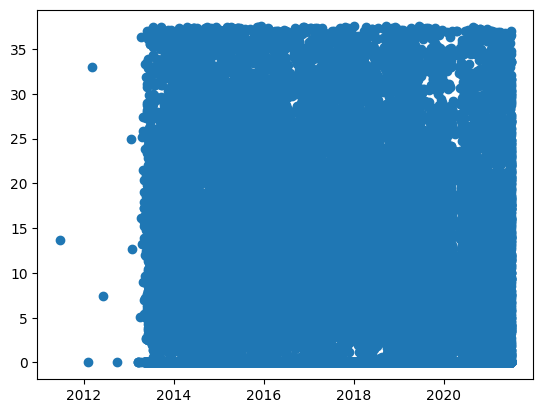

In [227]:
filtre=df1['tr013_type_erp_type']=='M'
plt.plot(df1[filtre]['date_visite_diagnostiqueur'],df1[filtre]['estimation_ges'],'o')

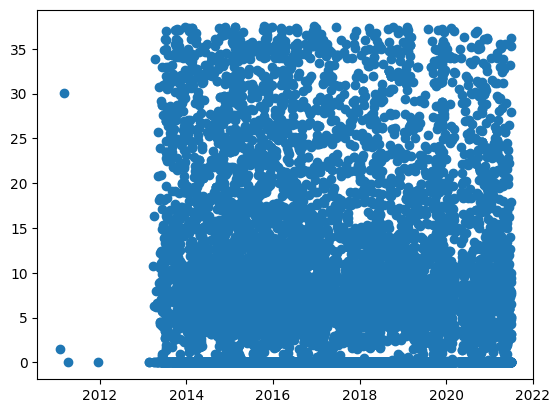

In [209]:
filter2=df1[filtre]['tr001_modele_dpe_id']==4
plt.plot(df1[filtre][filter2]['date_visite_diagnostiqueur'],df1[filtre][filter2]['estimation_ges'],'o')

C:\Users\marie\AppData\Local\Temp\ipykernel_12496\1334175104.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[filter1&filter2]
C:\Users\marie\AppData\Local\Temp\ipykernel_12496\1334175104.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(df1[filter1&filter2&filter3]['date_visite_diagnostiqueur'],df1[filter1&filter2&filter3]['estimation_ges'],'o')
C:\Users\marie\AppData\Local\Temp\ipykernel_12496\1334175104.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(df1[filter1&filter2&filter3]['date_visite_diagnostiqueur'],df1[filter1&filter2&filter3]['estimation_ges'],'o')


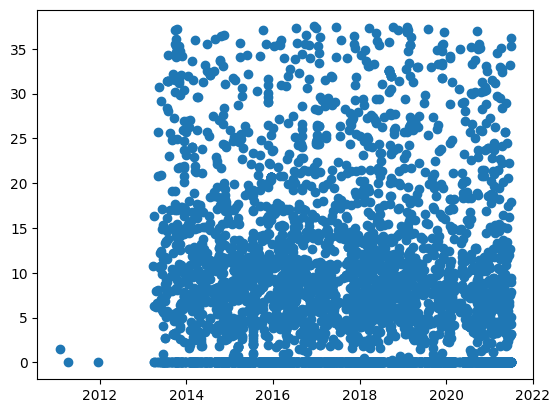

In [212]:
df1[filter1&filter2]
filter3=df1['usr_logiciel_id']==2
plt.plot(df1[filter1&filter2&filter3]['date_visite_diagnostiqueur'],df1[filter1&filter2&filter3]['estimation_ges'],'o')

In [235]:
np.array(df1['secteur_activite'])[:100]

array(['Autres (théâtres, salles de sport, restaurati',
       'Bureau, Administration, Enseignement', 'Commerce',
       ' Bureaux, administration, enseignement',
       'Autres (théâtres, salles de sport, restaurati', 'Artisanat',
       'Commerce', 'Bureau, Administration, Enseignement',
       'Bureau, Administration, Enseignement',
       'Bureau, Administration, Enseignement',
       'Autres (théâtres, salles de sport, restaurati',
       'Bureau, Administration, Enseignement', 'Bureaux',
       'Bureau, Administration, Enseignement',
       'Bureau, Administration, Enseignement',
       'Autres (théâtres, salles de sport, restaurati', 'Bureaux',
       'Autres (théâtres, salles de sport, restaurati', '\\N',
       'Centres Commerciaux', 'Bureaux',
       'Bureau, Administration, Enseignement',
       'Autres (théâtres, salles de sport, restaurati',
       'Autres (théâtres, salles de sport, restaurati',
       'Autres (théâtres, salles de sport, restaurati',
       'Occupation c